In [32]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle



In [33]:


df = pd.read_csv('diamond.csv')


df.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df.rename(columns = {'average us salary':'average_us_salary'}, inplace = True)
df.rename(columns = {'number of diamonds mined (millions)':'diamonds_mined'}, inplace = True)
print(df)

#If its not a numeric string data, it will convert to nan
df['index'] = pd.to_numeric(df['index'],errors='coerce')
df['carat'] = pd.to_numeric(df['carat'],errors='coerce')
df['average_us_salary'] = pd.to_numeric(df['average_us_salary'],errors='coerce')
df['diamonds_mined'] = pd.to_numeric(df['diamonds_mined'],errors='coerce')
df['depth'] = pd.to_numeric(df['depth'],errors='coerce')
df['table'] = pd.to_numeric(df['table'],errors='coerce')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['x'] = pd.to_numeric(df['x'],errors='coerce')
df['y'] = pd.to_numeric(df['y'],errors='coerce')
df['z'] = pd.to_numeric(df['z'],errors='coerce')
print(df)

df['cut'].replace(['TRUE','FALSE','MAYBE'],np.nan,inplace=True)
df['color'].replace(['TRUE','FALSE','MAYBE'],np.nan,inplace=True)
df['clarity'].replace(['TRUE','FALSE','MAYBE'],np.nan,inplace=True)
print(df['color'].tail(50))

print(df.describe())

       index carat        cut color clarity  average_us_salary  \
0          1  0.23      Ideal     E     SI2              31282   
1          2  0.21    Premium     E     SI1              40049   
2          3  0.23       Good     E     VS1              33517   
3          4  0.29    Premium     I     VS2              38495   
4          5  0.31       Good     J     SI2              34178   
...      ...   ...        ...   ...     ...                ...   
53935  53936  0.72      Ideal     D     SI1              43892   
53936  53937  0.72       Good     D     SI1              35532   
53937  53938   0.7  Very Good     D     SI1              32133   
53938  53939  0.86    Premium     H     SI2              44248   
53939  53940  0.75      Ideal     D     SI2              41412   

       diamonds_mined depth table price     x     y     z  
0                5.01  61.5    55   326  3.95  3.98  2.43  
1                1.69  59.8    61   326  3.89  3.84  2.31  
2                3.85  56.9

In [34]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print(numeric_df)
# Calculate mean,median,sd for each numeric column
means = numeric_df.mean()
medians = numeric_df.median()
sds = numeric_df.std()
print('mean',means)
print('median',medians)
print('standard deviation\n',sds)
print("\n mode : \n",df.mode(axis=0))

         index  carat  average_us_salary  diamonds_mined  depth  table  \
0          1.0   0.23              31282            5.01   61.5   55.0   
1          2.0   0.21              40049            1.69   59.8   61.0   
2          3.0   0.23              33517            3.85   56.9   65.0   
3          4.0   0.29              38495            3.49   62.4   58.0   
4          5.0   0.31              34178            4.70   63.3   58.0   
...        ...    ...                ...             ...    ...    ...   
53935  53936.0   0.72              43892            3.54   60.8   57.0   
53936  53937.0   0.72              35532            3.51   63.1   55.0   
53937  53938.0   0.70              32133            3.27   62.8   60.0   
53938  53939.0   0.86              44248            4.03   61.0   58.0   
53939  53940.0   0.75              41412            3.11   62.2   55.0   

        price     x     y     z  
0       326.0  3.95  3.98  2.43  
1       326.0  3.89  3.84  2.31  
2       3

In [35]:
numeric_df['carat']=numeric_df['carat'].fillna(medians)
numeric_df['average_us_salary'] = numeric_df['average_us_salary'].fillna(medians)
numeric_df['diamonds_mined']=numeric_df['diamonds_mined'].fillna(medians)
numeric_df['depth'] = numeric_df['depth'].fillna(medians)
numeric_df['table']=numeric_df['table'].fillna(medians)
numeric_df['price'] = numeric_df['price'].fillna(medians)
numeric_df['x']=numeric_df['x'].fillna(medians)
numeric_df['y'] = numeric_df['y'].fillna(medians)
numeric_df['z'] = numeric_df['z'].fillna(medians)
print(numeric_df)

df['cut'] = df['cut'].fillna(df['cut'].mode())
df['color'] = df['color'].fillna(df['color'].mode())
df['clarity'] = df['clarity'].fillna(df['clarity'].mode())
print(df)

         index  carat  average_us_salary  diamonds_mined  depth  table  \
0          1.0   0.23              31282            5.01   61.5   55.0   
1          2.0   0.21              40049            1.69   59.8   61.0   
2          3.0   0.23              33517            3.85   56.9   65.0   
3          4.0   0.29              38495            3.49   62.4   58.0   
4          5.0   0.31              34178            4.70   63.3   58.0   
...        ...    ...                ...             ...    ...    ...   
53935  53936.0   0.72              43892            3.54   60.8   57.0   
53936  53937.0   0.72              35532            3.51   63.1   55.0   
53937  53938.0   0.70              32133            3.27   62.8   60.0   
53938  53939.0   0.86              44248            4.03   61.0   58.0   
53939  53940.0   0.75              41412            3.11   62.2   55.0   

        price     x     y     z  
0       326.0  3.95  3.98  2.43  
1       326.0  3.89  3.84  2.31  
2       3

In [36]:
df['cut'] = df['cut'].str.lower()
df['color'] = df['color'].str.lower()
df['clarity'] = df['clarity'].str.lower()
print(df)

         index  carat        cut color clarity  average_us_salary  \
0          1.0   0.23      ideal     e     si2              31282   
1          2.0   0.21    premium     e     si1              40049   
2          3.0   0.23       good     e     vs1              33517   
3          4.0   0.29    premium     i     vs2              38495   
4          5.0   0.31       good     j     si2              34178   
...        ...    ...        ...   ...     ...                ...   
53935  53936.0   0.72      ideal     d     si1              43892   
53936  53937.0   0.72       good     d     si1              35532   
53937  53938.0   0.70  very good     d     si1              32133   
53938  53939.0   0.86    premium     h     si2              44248   
53939  53940.0   0.75      ideal     d     si2              41412   

       diamonds_mined  depth  table   price     x     y     z  
0                5.01   61.5   55.0   326.0  3.95  3.98  2.43  
1                1.69   59.8   61.0   326.0

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

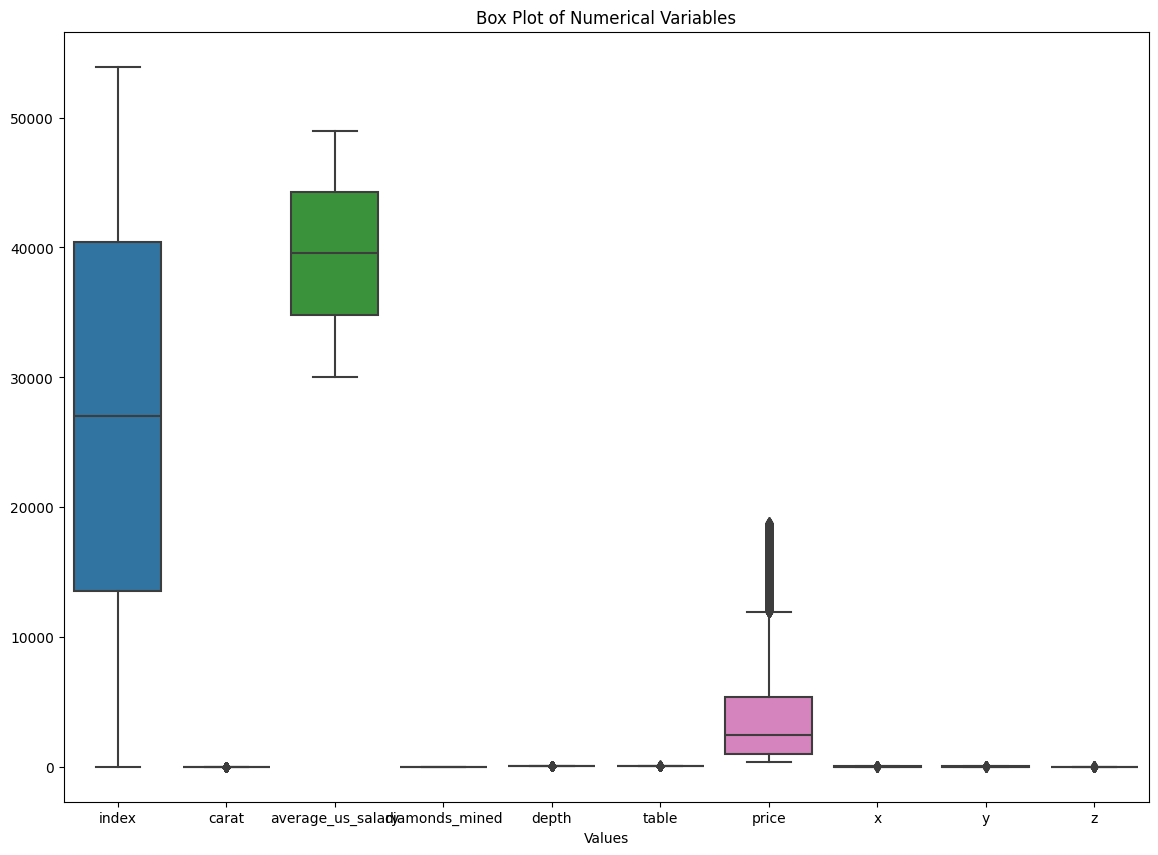

In [37]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=df)

plt.xlabel("Values")
plt.title("Box Plot of Numerical Variables")

plt.show()


In [38]:
# From the graph I could not see any outliers for the columns : index, average_us_salary and diamonds_mined
# Hence will handle the outliers for other columns

In [39]:
def find_quartiles (feature):
    Q1 = numeric_df[feature].quantile(0.25)
    Q3 = numeric_df[feature].quantile(0.75)
    IQR = Q3-Q1
    threshold = 1.5 * IQR
    low_outlier_limit = Q1-threshold
    high_outlier_limit = Q3+threshold
    return low_outlier_limit,high_outlier_limit

low_limit,high_limit=find_quartiles('carat')
numeric_df['carat'] = numeric_df['carat'].apply(lambda x : medians['carat'] if (x < low_limit) | (x > high_limit) else x)

low_limit,high_limit=find_quartiles('average_us_salary')
numeric_df['average_us_salary'] = numeric_df['average_us_salary'].apply(lambda x : medians['average_us_salary'] if (x < low_limit) | (x > high_limit) else x)

low_limit,high_limit=find_quartiles('diamonds_mined')
numeric_df['diamonds_mined'] = numeric_df['diamonds_mined'].apply(lambda x : medians['diamonds_mined'] if (x < low_limit) | (x > high_limit) else x)

low_limit,high_limit=find_quartiles('depth')
numeric_df['depth'] = numeric_df['depth'].apply(lambda x : medians['depth'] if (x < low_limit) | (x > high_limit) else x)

low_limit,high_limit=find_quartiles('table')
numeric_df['table'] = numeric_df['table'].apply(lambda x : medians['table'] if (x < low_limit) | (x > high_limit) else x)

low_limit,high_limit=find_quartiles('price')
numeric_df['price'] = numeric_df['price'].apply(lambda x : medians['price'] if (x < low_limit) | (x > high_limit) else x)

low_limit,high_limit=find_quartiles('x')
numeric_df['x'] = numeric_df['x'].apply(lambda x : medians['x'] if (x < low_limit) | (x > high_limit) else x)

low_limit,high_limit=find_quartiles('y')
numeric_df['y'] = numeric_df['y'].apply(lambda x : medians['y'] if (x < low_limit) | (x > high_limit) else x)

low_limit,high_limit=find_quartiles('z')
numeric_df['z'] = numeric_df['z'].apply(lambda x : medians['z'] if (x < low_limit) | (x > high_limit) else x)


df['carat'] = numeric_df['carat']
df['average_us_salary'] = numeric_df['average_us_salary']
df['diamonds_mined'] = numeric_df['diamonds_mined']
df['depth'] = numeric_df['depth']
df['table'] = numeric_df['table']
df['price'] = numeric_df['price']
df['x'] = numeric_df['x']
df['y'] = numeric_df['y']
df['z'] = numeric_df['z']

print(df)

         index  carat        cut color clarity  average_us_salary  \
0          1.0   0.23      ideal     e     si2              31282   
1          2.0   0.21    premium     e     si1              40049   
2          3.0   0.23       good     e     vs1              33517   
3          4.0   0.29    premium     i     vs2              38495   
4          5.0   0.31       good     j     si2              34178   
...        ...    ...        ...   ...     ...                ...   
53935  53936.0   0.72      ideal     d     si1              43892   
53936  53937.0   0.72       good     d     si1              35532   
53937  53938.0   0.70  very good     d     si1              32133   
53938  53939.0   0.86    premium     h     si2              44248   
53939  53940.0   0.75      ideal     d     si2              41412   

       diamonds_mined  depth  table   price     x     y     z  
0                5.01   61.5   55.0   326.0  3.95  3.98  2.43  
1                1.69   59.8   61.0   326.0

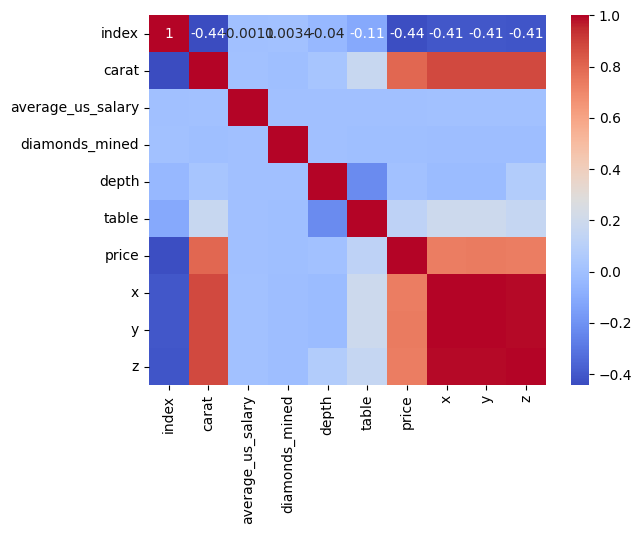

In [40]:
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


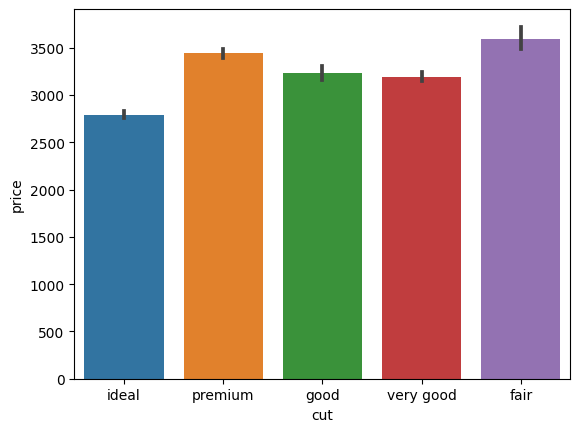

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


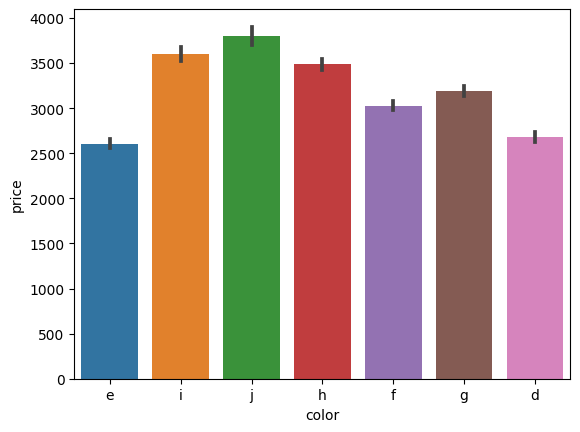

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


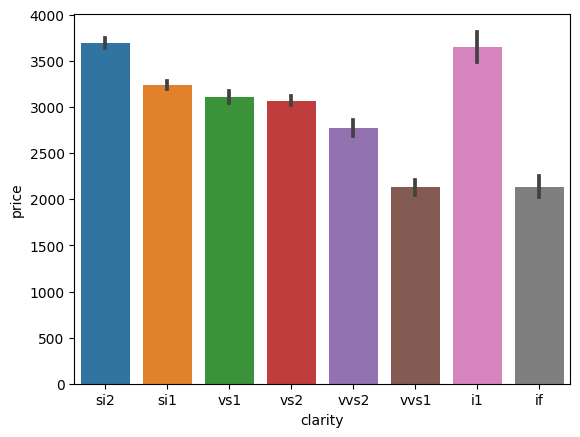

In [41]:
sns.barplot(x='cut',y='price', data=df)
plt.show()
sns.barplot(x='color',y='price', data=df)
plt.show()
sns.barplot(x='clarity',y='price', data=df)
plt.show()

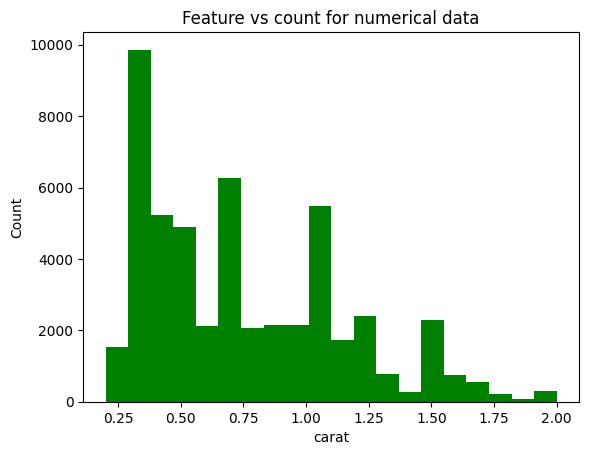

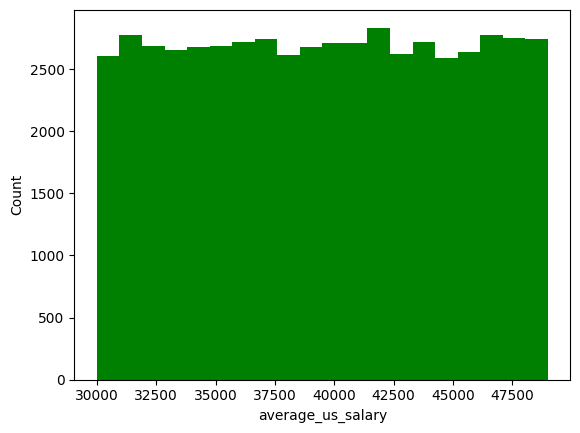

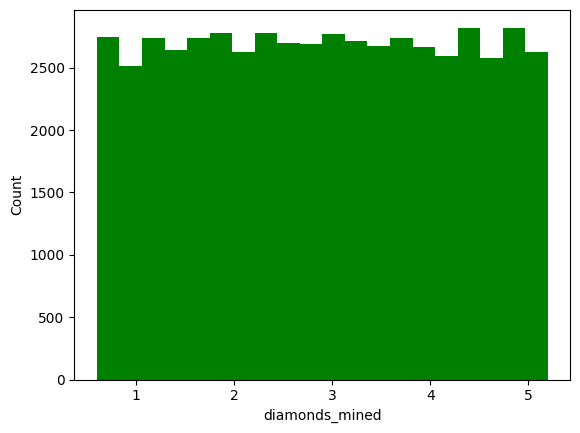

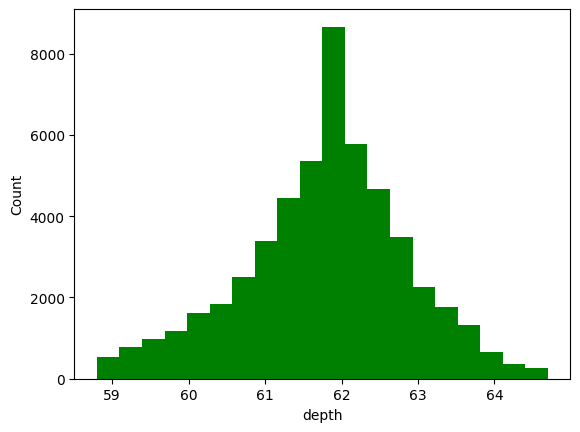

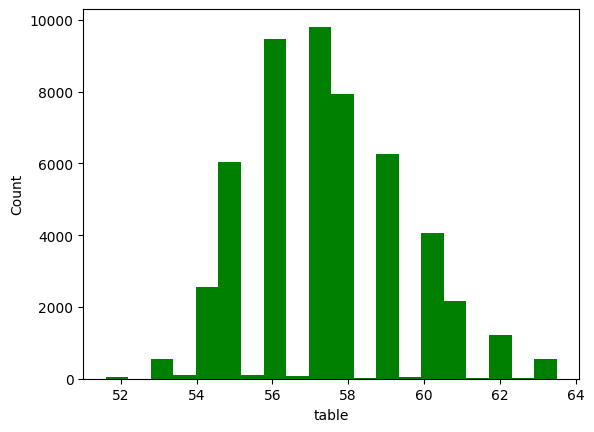

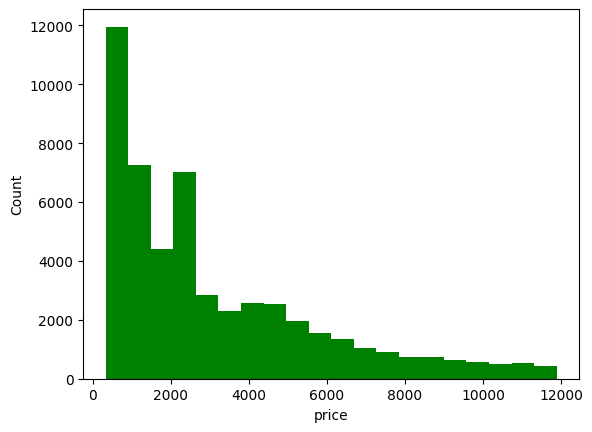

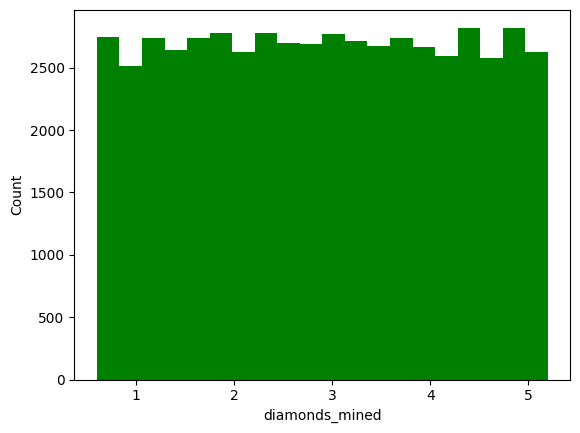

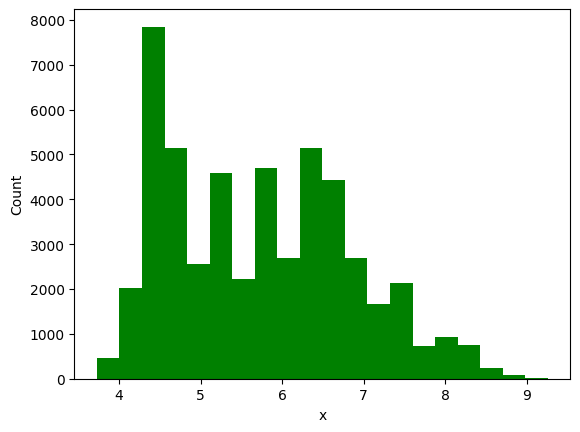

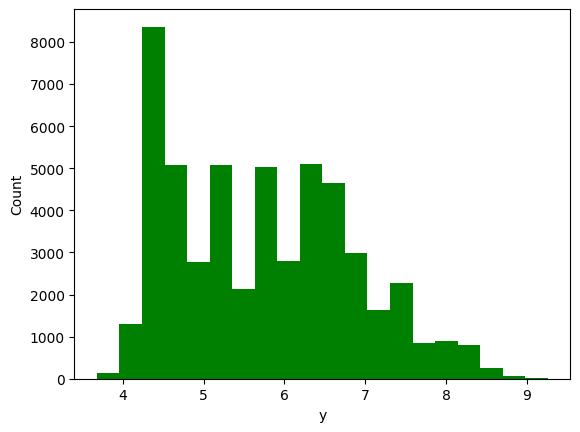

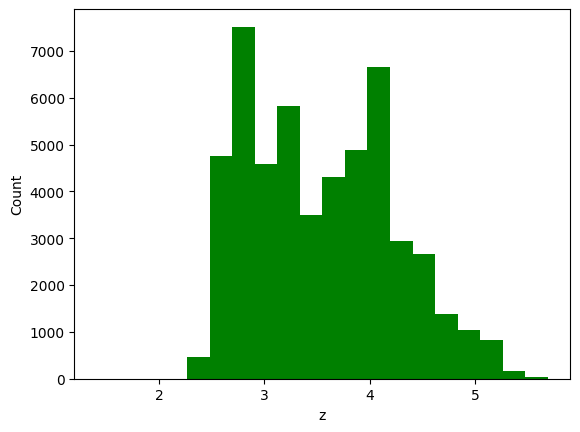

In [42]:
plt.hist(df['carat'], bins=20, color='green')
plt.xlabel('carat')
plt.ylabel('Count')
plt.title('Feature vs count for numerical data')
plt.show()
plt.hist(df['average_us_salary'], bins=20, color='green')
plt.xlabel('average_us_salary')
plt.ylabel('Count')
plt.show()
plt.hist(df['diamonds_mined'], bins=20, color='green')
plt.xlabel('diamonds_mined')
plt.ylabel('Count')
plt.show()
plt.hist(df['depth'], bins=20, color='green')
plt.xlabel('depth')
plt.ylabel('Count')
plt.show()
plt.hist(df['table'], bins=20, color='green')
plt.xlabel('table')
plt.ylabel('Count')
plt.show()
plt.hist(df['price'], bins=20, color='green')
plt.xlabel('price')
plt.ylabel('Count')
plt.show()
plt.hist(df['diamonds_mined'], bins=20, color='green')
plt.xlabel('diamonds_mined')
plt.ylabel('Count')
plt.show()
plt.hist(df['x'], bins=20, color='green')
plt.xlabel('x')
plt.ylabel('Count')
plt.show()
plt.hist(df['y'], bins=20, color='green')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()
plt.hist(df['z'], bins=20, color='green')
plt.xlabel('z')
plt.ylabel('Count')
plt.show()

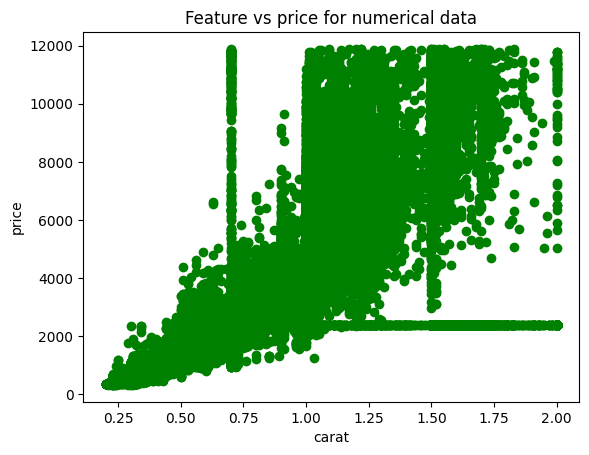

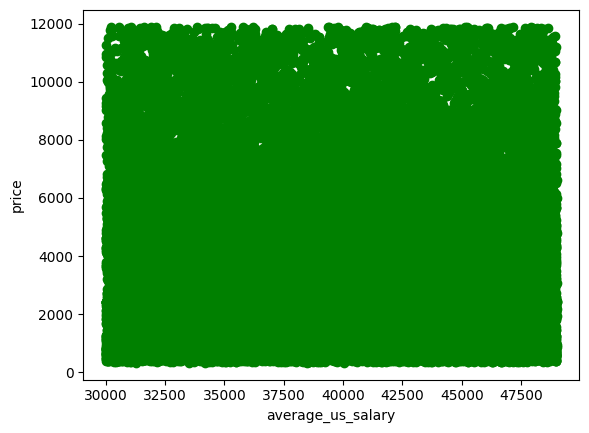

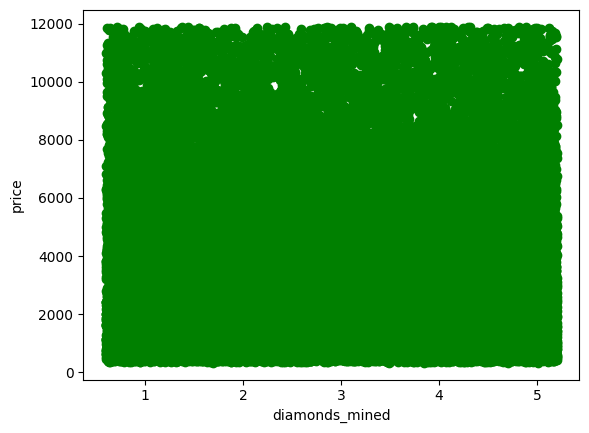

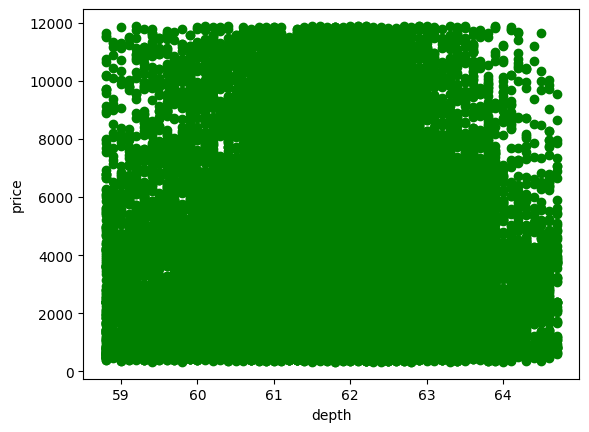

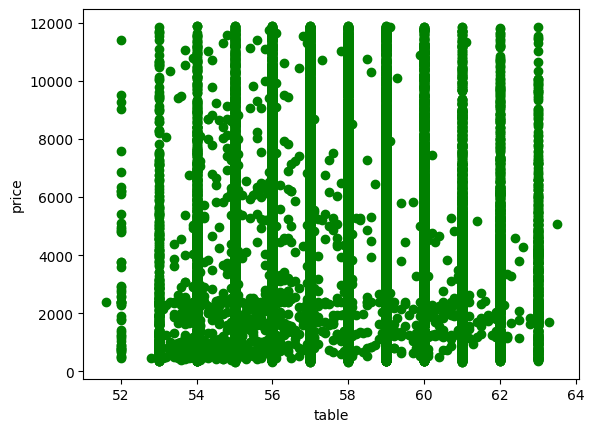

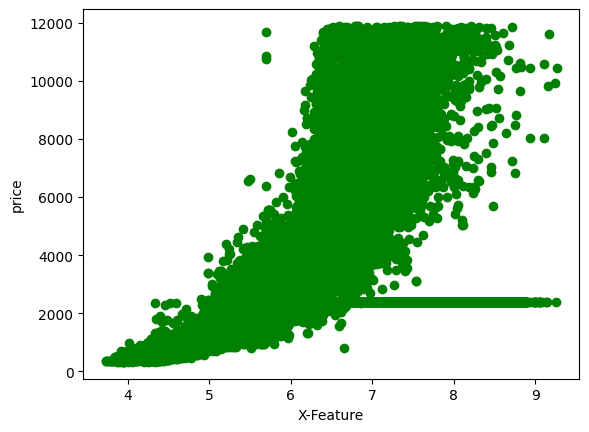

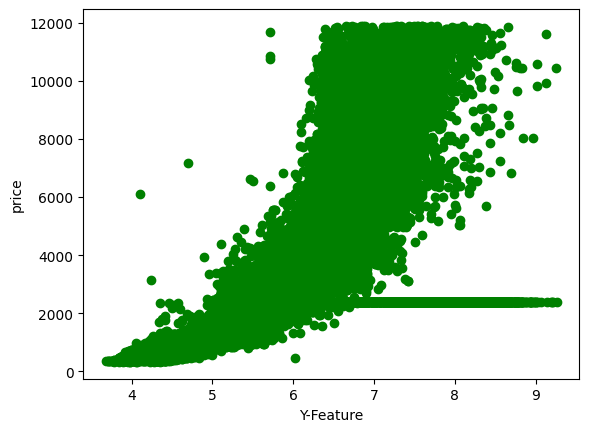

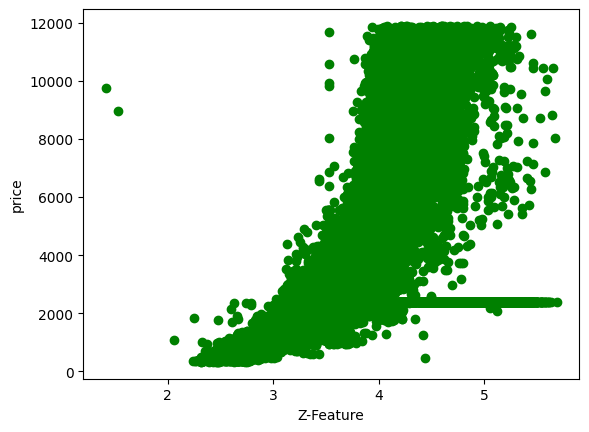

In [43]:
plt.scatter(df['carat'], df['price'], color='green')
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Feature vs price for numerical data')
plt.show()
plt.scatter(df['average_us_salary'], df['price'], color='green')
plt.xlabel('average_us_salary')
plt.ylabel('price')
plt.show()
plt.scatter(df['diamonds_mined'], df['price'], color='green')
plt.xlabel('diamonds_mined')
plt.ylabel('price')
plt.show()
plt.scatter(df['depth'],df['price'], color='green')
plt.xlabel('depth')
plt.ylabel('price')
plt.show()
plt.scatter(df['table'], df['price'], color='green')
plt.xlabel('table')
plt.ylabel('price')
plt.show()
plt.scatter(df['x'], df['price'], color='green')
plt.xlabel('X-Feature')
plt.ylabel('price')
plt.show()
plt.scatter(df['y'], df['price'], color='green')
plt.xlabel('Y-Feature')
plt.ylabel('price')
plt.show()
plt.scatter(df['z'], df['price'], color='green')
plt.xlabel('Z-Feature')
plt.ylabel('price')
plt.show()

In [44]:
#here we could see the scatters appropriately for the features x,y,z and carat
#other features seems to be equally distributed, so it wont have any impact on prediction

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


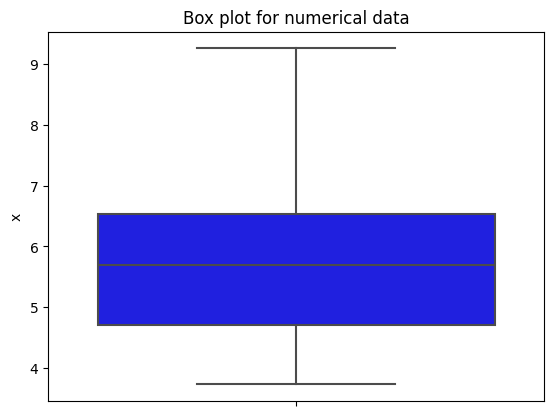

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


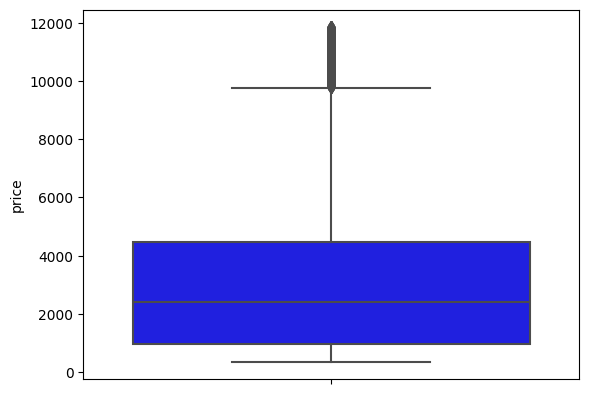

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


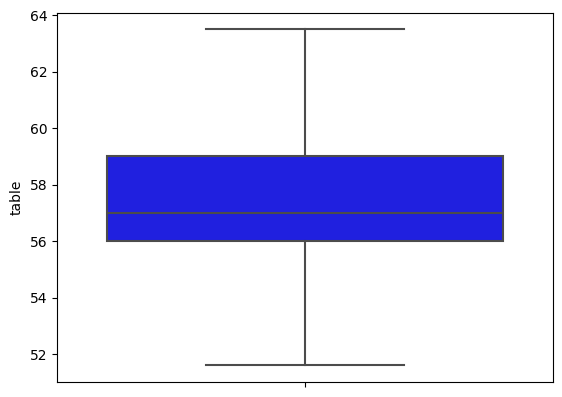

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


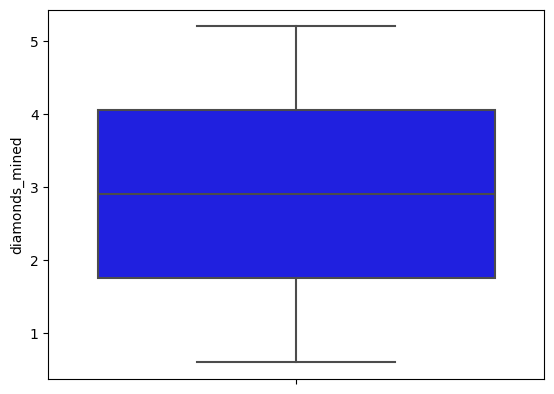

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


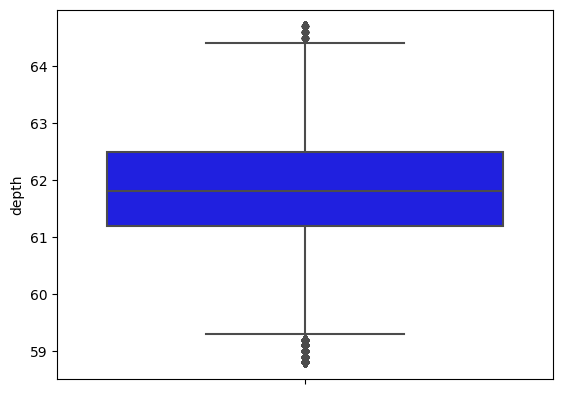

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


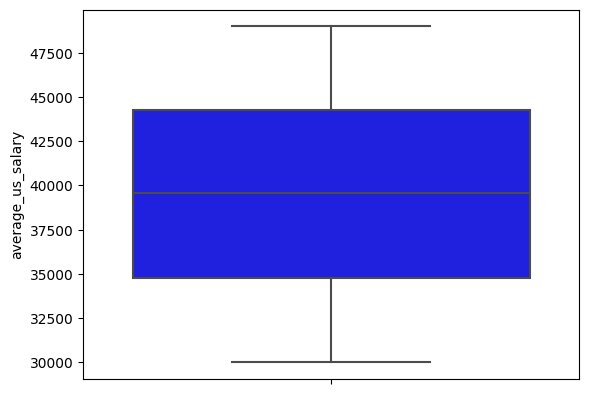

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


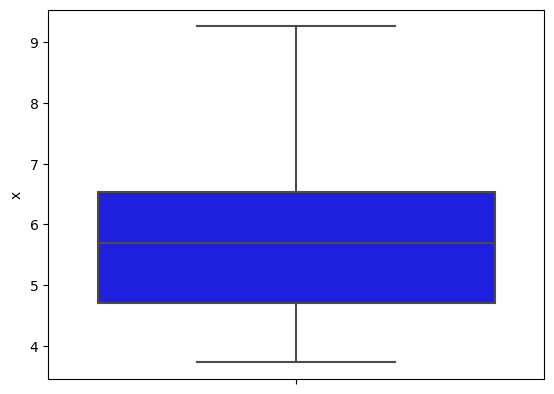

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


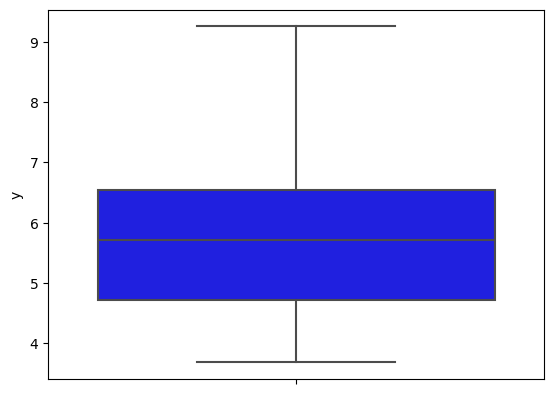

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


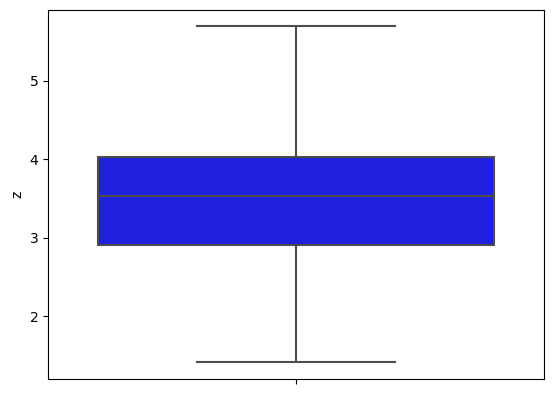

In [45]:
sns.boxplot(data=df, y='x', color='blue') 
plt.title('Box plot for numerical data')
plt.show()
sns.boxplot(data=df, y='price', color='blue') 
plt.show()
sns.boxplot(data=df, y='table', color='blue') 
plt.show()
sns.boxplot(data=df, y='diamonds_mined', color='blue') 
plt.show()
sns.boxplot(data=df, y='depth', color='blue') 
plt.show()
sns.boxplot(data=df, y='average_us_salary', color='blue') 
plt.show()

sns.boxplot(data=df, y='x', color='blue') 
plt.show()
sns.boxplot(data=df, y='y', color='blue') 
plt.show()
sns.boxplot(data=df, y='z', color='blue') 
plt.show()

In [46]:
#In box plot visualization we can view the Q1 and Q2 ranges and the interqurtile ranges to check for any autliers

In [47]:
df['cut'] = df['cut'].astype('category')
df['cut'] = pd.Categorical(df.cut).codes

df['color'] = df['color'].astype('category')
df['color'] = pd.Categorical(df.color).codes

df['clarity'] = df['clarity'].astype('category')
df['clarity'] = pd.Categorical(df.clarity).codes

print(df)

         index  carat  cut  color  clarity  average_us_salary  diamonds_mined  \
0          1.0   0.23    2      1        3              31282            5.01   
1          2.0   0.21    3      1        2              40049            1.69   
2          3.0   0.23    1      1        4              33517            3.85   
3          4.0   0.29    3      5        5              38495            3.49   
4          5.0   0.31    1      6        3              34178            4.70   
...        ...    ...  ...    ...      ...                ...             ...   
53935  53936.0   0.72    2      0        2              43892            3.54   
53936  53937.0   0.72    1      0        2              35532            3.51   
53937  53938.0   0.70    4      0        2              32133            3.27   
53938  53939.0   0.86    3      4        3              44248            4.03   
53939  53940.0   0.75    2      0        3              41412            3.11   

       depth  table   price

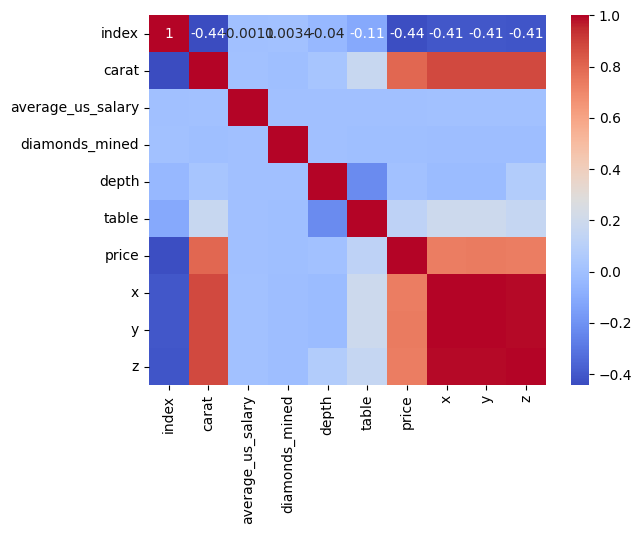

In [54]:
#Drawn this to ensure corelateion
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [48]:
corr_mat = df.corr()
corr_mean_mat = corr_mat.abs().mean()
print(corr_mean_mat)

index                0.267769
carat                0.422507
cut                  0.132497
color                0.187620
clarity              0.177014
average_us_salary    0.080030
diamonds_mined       0.081258
depth                0.124126
table                0.192447
price                0.368893
x                    0.439790
y                    0.439277
z                    0.439243
dtype: float64


In [49]:
corelation_threshold = 0.3
unrelated_features = corr_mean_mat[corr_mean_mat < corelation_threshold]
print(unrelated_features)

index                0.267769
cut                  0.132497
color                0.187620
clarity              0.177014
average_us_salary    0.080030
diamonds_mined       0.081258
depth                0.124126
table                0.192447
dtype: float64


In [50]:
df = df.drop(columns = unrelated_features.index)

In [51]:
#Normalization
df_min = df.min()
df_max = df.max()

df = (df-df_min)/(df_max-df_min)
print(df)
print(df.median())

          carat     price         x         y         z
0      0.016667  0.000000  0.039783  0.053763  0.238318
1      0.005556  0.000000  0.028933  0.028674  0.210280
2      0.016667  0.000086  0.057866  0.069892  0.210280
3      0.050000  0.000692  0.084991  0.098566  0.285047
4      0.061111  0.000778  0.110307  0.120072  0.313084
...         ...       ...       ...       ...       ...
53935  0.288889  0.210258  0.365280  0.372760  0.488318
53936  0.288889  0.210258  0.354430  0.370968  0.514019
53937  0.277778  0.210258  0.349005  0.358423  0.502336
53938  0.366667  0.210258  0.437613  0.437276  0.544393
53939  0.305556  0.210258  0.379747  0.392473  0.521028

[53940 rows x 5 columns]
carat    0.277778
price    0.179467
x        0.356239
y        0.363799
z        0.495327
dtype: float64


In [52]:
df.to_csv('diamond_cleaned.csv',index=False)